# 🔥 A notebook to explain why caching is great

In [1]:
import time
from tqdm.notebook import tqdm
import os
import pathlib
import pandas as pd
from fuseimg.datasets.knight import KNIGHT
from torch.utils.data.dataloader import DataLoader
from fuse.data.utils.collates import CollateDefault

In [2]:
experiment_num = 0
cache_path = "/dccstor/mm_hcls/shatz/knight/cache/"
data_path = os.environ["KNIGHT_DATA"]
cache_path = os.path.join(cache_path, f"exp_num_{str(experiment_num)}")

In [3]:
splits = pd.read_pickle("/u/shatz/repos/fuse-med-ml/examples/fuse_examples/imaging/classification/knight/baseline/splits_final.pkl")
split = splits[0]

In [4]:
num_epochs = range(15)
num_workers = 48
batch_size = 4

# 🚙 Dataset without cache

In [5]:
train_ds_nocache, _ = KNIGHT.dataset(
    data_path=data_path,
    cache_dir=None,
    split=split,
    reset_cache=False,
    resize_to=(70, 256, 256),
    num_workers=num_workers,
)

train_dl_nocache = DataLoader(
    dataset=train_ds_nocache,
    shuffle=False,
    drop_last=False,
    collate_fn=CollateDefault(),
    num_workers=num_workers,
    batch_size=batch_size
)

times_nocache = []
for epoch in tqdm(num_epochs):
    epoch_start_time = time.time()
    for _ in tqdm(train_dl_nocache):
        pass
    epoch_end_time = time.time()
    epoch_elapsed_time = epoch_end_time - epoch_start_time
    times_nocache.append(epoch_elapsed_time)
    print(f"Epoch {epoch} time: {epoch_elapsed_time}")
print(f"epoch times: {times_nocache}")


✋ Caching is OFF
- Load data:
- Load data: Done
Train Data: Done {'attrs': 'bold'}
Validation Data: {'attrs': 'bold'}
- Load and cache data:
- Load and cache data: Done
Validation Data: Done {'attrs': 'bold'}


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

Epoch 0 time: 61.46391844749451


  0%|          | 0/60 [00:00<?, ?it/s]

Epoch 1 time: 61.66864585876465


  0%|          | 0/60 [00:00<?, ?it/s]

Epoch 2 time: 61.12218499183655


  0%|          | 0/60 [00:00<?, ?it/s]

Epoch 3 time: 60.936548471450806


  0%|          | 0/60 [00:00<?, ?it/s]

Epoch 4 time: 60.891517877578735


  0%|          | 0/60 [00:00<?, ?it/s]

Epoch 5 time: 61.79263496398926


  0%|          | 0/60 [00:00<?, ?it/s]

Epoch 6 time: 60.84686303138733


  0%|          | 0/60 [00:00<?, ?it/s]

Epoch 7 time: 60.65354871749878


  0%|          | 0/60 [00:00<?, ?it/s]

Epoch 8 time: 61.93774604797363


  0%|          | 0/60 [00:00<?, ?it/s]

Epoch 9 time: 61.120537519454956


  0%|          | 0/60 [00:00<?, ?it/s]

Epoch 10 time: 60.74915337562561


  0%|          | 0/60 [00:00<?, ?it/s]

Epoch 11 time: 61.64638686180115


  0%|          | 0/60 [00:00<?, ?it/s]

Epoch 12 time: 61.43081068992615


  0%|          | 0/60 [00:00<?, ?it/s]

Epoch 13 time: 61.564696073532104


  0%|          | 0/60 [00:00<?, ?it/s]

Epoch 14 time: 61.39484715461731
epoch times: [61.46391844749451, 61.66864585876465, 61.12218499183655, 60.936548471450806, 60.891517877578735, 61.79263496398926, 60.84686303138733, 60.65354871749878, 61.93774604797363, 61.120537519454956, 60.74915337562561, 61.64638686180115, 61.43081068992615, 61.564696073532104, 61.39484715461731]


# 🏎 Dataset WITH cache ⚡️

In [6]:
cache_start_time = time.time()
train_ds_cache, _ = KNIGHT.dataset(
    data_path=data_path,
    cache_dir=cache_path,
    split=split,
    reset_cache=False,
    resize_to=(70, 256, 256),
    num_workers=num_workers
)
cache_end_time = time.time()
total_cache_time = cache_end_time - cache_start_time
print(f"Total time to cache: {total_cache_time}")

train_dl_cache = DataLoader(
    dataset=train_ds_cache,
    shuffle=False,
    drop_last=False,
    collate_fn=CollateDefault(),
    num_workers=num_workers,
    batch_size=batch_size
)

times_cache = []
for epoch in tqdm(num_epochs):
    epoch_start_time = time.time()
    for _ in tqdm(train_dl_cache):
        pass
    epoch_end_time = time.time()
    epoch_elapsed_time = epoch_end_time - epoch_start_time
    times_cache.append(epoch_elapsed_time)
    print(f"Epoch {epoch} time: {epoch_elapsed_time}")
print(f"epoch times: {times_cache}")

👍 Caching is ON
pipeline description hash for [train_cache] is: hash_9c4aa89acd27fb78ddce20428f575665
- Load data:
multiprocess pool created with 48 workers.


caching: 100%|███████████████████████████████████████████████████████████| 240/240 [00:40<00:00,  5.85it/s]

======== wrote /dccstor/mm_hcls/shatz/knight/cache/exp_num_0/train/train_cache/hash_9c4aa89acd27fb78ddce20428f575665/pipeline_hash_9c4aa89acd27fb78ddce20428f575665_desc.txt
- Load data: Done
Train Data: Done {'attrs': 'bold'}
Validation Data: {'attrs': 'bold'}
pipeline description hash for [val_cache] is: hash_9c4aa89acd27fb78ddce20428f575665
- Load and cache data:


multiprocess pool created with 48 workers.


caching: 100%|█████████████████████████████████████████████████████████████| 60/60 [00:21<00:00,  2.78it/s]

======== wrote /dccstor/mm_hcls/shatz/knight/cache/exp_num_0/val/val_cache/hash_9c4aa89acd27fb78ddce20428f575665/pipeline_hash_9c4aa89acd27fb78ddce20428f575665_desc.txt
- Load and cache data: Done
Validation Data: Done {'attrs': 'bold'}
Total time to cache: 64.88441896438599


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

Epoch 0 time: 18.632019996643066


  0%|          | 0/60 [00:00<?, ?it/s]

Epoch 1 time: 18.550448179244995


  0%|          | 0/60 [00:00<?, ?it/s]

Epoch 2 time: 18.664944648742676


  0%|          | 0/60 [00:00<?, ?it/s]

Epoch 3 time: 18.517752647399902


  0%|          | 0/60 [00:00<?, ?it/s]

Epoch 4 time: 18.47329592704773


  0%|          | 0/60 [00:00<?, ?it/s]

Epoch 5 time: 18.664068698883057


  0%|          | 0/60 [00:00<?, ?it/s]

Epoch 6 time: 18.613131761550903


  0%|          | 0/60 [00:00<?, ?it/s]

Epoch 7 time: 18.765142679214478


  0%|          | 0/60 [00:00<?, ?it/s]

Epoch 8 time: 18.491400241851807


  0%|          | 0/60 [00:00<?, ?it/s]

Epoch 9 time: 19.684142589569092


  0%|          | 0/60 [00:00<?, ?it/s]

Epoch 10 time: 19.391892194747925


  0%|          | 0/60 [00:00<?, ?it/s]

Epoch 11 time: 19.368141889572144


  0%|          | 0/60 [00:00<?, ?it/s]

Epoch 12 time: 18.426514148712158


  0%|          | 0/60 [00:00<?, ?it/s]

Epoch 13 time: 19.024502277374268


  0%|          | 0/60 [00:00<?, ?it/s]

Epoch 14 time: 18.930696725845337
epoch times: [18.632019996643066, 18.550448179244995, 18.664944648742676, 18.517752647399902, 18.47329592704773, 18.664068698883057, 18.613131761550903, 18.765142679214478, 18.491400241851807, 19.684142589569092, 19.391892194747925, 19.368141889572144, 18.426514148712158, 19.024502277374268, 18.930696725845337]


# 📊 Compare cache vs no cache

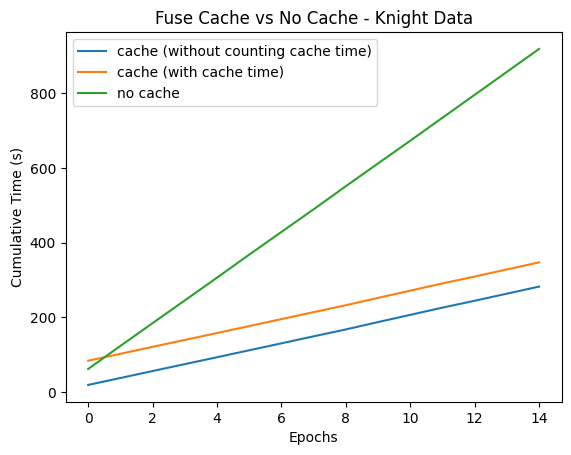

In [10]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.cumsum(times_cache), label="cache (without counting cache time)")
plt.plot([t + total_cache_time for t in np.cumsum(times_cache)], label="cache (with cache time)")
plt.plot(np.cumsum(times_nocache), label="no cache")
plt.xlabel("Epochs")
plt.ylabel("Cumulative Time (s)")
plt.title("Fuse Cache vs No Cache - Knight Data")
plt.legend()
plt.show()